In [1]:
from sympy import *
import numpy as np
init_printing(use_unicode=False, wrap_line=False, no_global=True)
from sympy.solvers.inequalities import solve_univariate_inequality

## Преобразования функций и полиномы. Домашнее задание

С помощью SymPy найдите полиномы, описывающие данные наборы точек. Затем проведите полное исследование каждого полученного полинома: проверьте четность/нечетность, найдите нули, промежутки знакопостоянства. Постройте их графики. С помощью изменения промежутка для х добейтесь того, чтобы все нули были отображены на графике функции.<br><br>
Средний уровень <br><br>
$(-2, 2), (-1, 1), (0, 0), (1, 1), (2, 2)$<br><br>
Сложный уровень <br><br>
$(-3, 33), (-2, 31), (-1, 18), (1, -18), (2, -31), (3, -33)$


In [3]:
### YOUR CODE HERE 
def coef_polinom(list_tup):
    """Фунция  получения коэффициентов для полиномной интреполяции
       Function for getting coefficients polynom for polynomial interpolation
    
    
    list_tup список кортежей координат точек.
             list of points tupleses
    
    
    Возвращает список символов коэффициентов и коэффициенты формата sympy.sets.sets.FiniteSet
    retuns list of coefficient symbols and coefficients as sympy.sets.sets.FiniteSet object"""
    
    
    list_symbol=[]
    for i in range(len(list_tup)):
        sym=Symbol('a'+str(i))
        list_symbol.append(sym)
    list_symbol.reverse()
    m=[]
    for i in range(len(list_tup)):
      l=[]
      for k in range(len(list_tup)):
          
          l.append(list_tup[i][0]**k)
      l.reverse()    
      m.append(l)
    A=Matrix(m)
    B=Matrix([list_tup[i][1] for i in range(len(list_tup))])
    return [list_symbol,linsolve((A,B),list_symbol)]



def control(f,list_tup_):
    """функция проверки на входе принимает два параметра
       testing function/ Takes two parametrs
    
       f  функция для проверки в формате sympy.core.add.
          function for testing as sympy.core.add. object
       list_tup_ список координат точек (кортежи) для проверки
                 list points for testing
       
       
       Результат  выводит пользовотелю на экран по всем точка и итоговый (если пройдены все тесты)
        displays result  """
    print('testing function')
    display(f)
    itog=True
    for i in list_tup_:
        color='\033[42m'
        if i[1]!=f.subs(x,i[0]):
            color= '\033[45m'     
        
            
        
        print(f'point{i} function value {f.subs(x,i[0])}. {" "*(20-len(str(i)+str(f.subs(x,i[0]))))} result testing  {color}{i[1]==f.subs(x,i[0])}\033[0m')
        itog=itog*(i[1]==f.subs(x,i[0]))
    if not itog:
        color= '\033[45m'
        
    print(f'\n Test passed {color} {bool(itog)} \033[0m')


In [4]:
list_tup1=[(-3,33),(-2,31),(-1,18),(1,-18),(2,-31),(3,-33)]
display(list_tup1,(coef_polinom(list_tup1)))


In [5]:
x=Symbol('x')
f=Rational(1,120)*x**5+Rational(19,24)*x**3-Rational(94,5)*x
f

$f(x)=-f(-x)$ следовательно функция нечетная 

'Нули функции'

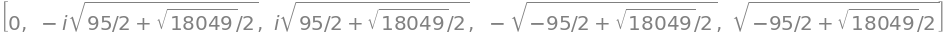

In [6]:
display('Нули функции')
solve(f,x)

#### решаем неравенство
$f(x) > 0$

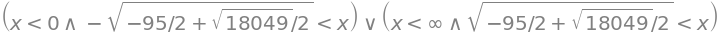

In [7]:
solve_univariate_inequality(f>0,x)

#### решаем неравенство
$f(x) < 0$

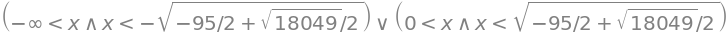

In [8]:
solve_univariate_inequality(f<0,x)

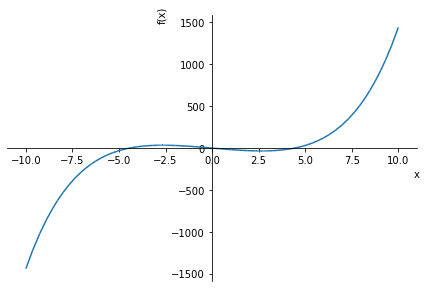

In [9]:
plot(f)

In [10]:
list_tup44=[(-3,33),(-2,31),(-1,18),(1,-19),(2,-31),(3,-33)]
control(f,list_tup1)

testing function


point(-3, 33) function value 33.            result testing  True
point(-2, 31) function value 31.            result testing  True
point(-1, 18) function value 18.            result testing  True
point(1, -18) function value -18.           result testing  True
point(2, -31) function value -31.           result testing  True
point(3, -33) function value -33.           result testing  True

 Test passed  True 


#### Проверим проверяющую функцию. 
А то может быть она выдает всегда **True**   
Просто поменяем одну из координат точек   
for testing "testing function" change one point to wrong

In [13]:
list_tup1=[(-3,33),(-2,31),(-1,18),(1,-18),(2,-31),(3,-33)]
list_tup44=[(-3,33),(-2,31),(-1,18),(1,-19),(2,-31),(3,-33)]
control(f,list_tup44)

testing function


point(-3, 33) function value 33.            result testing  True
point(-2, 31) function value 31.            result testing  True
point(-1, 18) function value 18.            result testing  True
point(1, -19) function value -18.           result testing  False
point(2, -31) function value -31.           result testing  True
point(3, -33) function value -33.           result testing  True

 Test passed  False 


In [14]:
# расчет коэффициентов первого набора точек
list_tup2=[(-2,2),(-1,1),(0,0),(1,1),(2,2)]
display(list_tup2,(coef_polinom(list_tup2)))

In [15]:
g = -Rational(1,6)*x**4+Rational(7,6)*x**2
g

In [16]:
control(g,list_tup2)

testing function


point(-2, 2) function value 2.              result testing  True
point(-1, 1) function value 1.              result testing  True
point(0, 0) function value 0.               result testing  True
point(1, 1) function value 1.               result testing  True
point(2, 2) function value 2.               result testing  True

 Test passed  True 


#### ищем нули функции

In [17]:
solve(g,x)

#### решаем неравенство
$g(x) > 0$

In [18]:
solve_univariate_inequality(g > 0, x)

#### решаем неравенство
$g(x) < 0$

In [108]:
solve_univariate_inequality(g < 0, x)

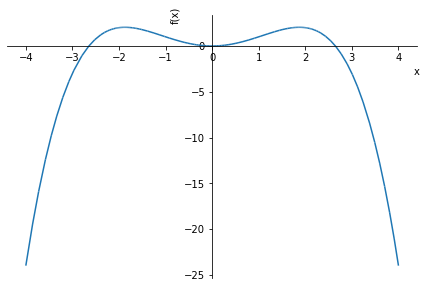

In [98]:
plot(g,(x,-4,4))

In [140]:
type(coef_polinom(list_tup1)[1])

sympy.sets.sets.FiniteSet

In [141]:
coef_polinom(list_tup1)[1]

In [142]:
coef_polinom(list_tup1)[1][0]

TypeError: 'FiniteSet' object is not subscriptable

In [1]:
import datetime
datetime.datetime.now()

datetime.datetime(2021, 4, 14, 23, 14, 53, 743268)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
